In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as skl
import tensorflow as tf


In [25]:
#Read in cleaned data
df = pd.read_csv("Data/carsAvgPrice.csv")
df.head()

,Unnamed: 0,Brand,Model,Year,Status,Mileage,Age,AveragePrice
0,0,Acura,ILX,2013,Used,86557.0,11,13900.0
1,1,Acura,ILX,2014,Used,148266.0,10,10996.0
2,2,Acura,ILX,2015,Used,77223.0,9,13650.0
3,3,Acura,ILX,2016,Used,56546.0,8,16900.0
4,4,Acura,ILX,2016,Used,72301.0,8,16999.0


In [26]:
#Dropping dup index
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Brand,Model,Year,Status,Mileage,Age,AveragePrice
0,Acura,ILX,2013,Used,86557.0,11,13900.0
1,Acura,ILX,2014,Used,148266.0,10,10996.0
2,Acura,ILX,2015,Used,77223.0,9,13650.0
3,Acura,ILX,2016,Used,56546.0,8,16900.0
4,Acura,ILX,2016,Used,72301.0,8,16999.0


In [27]:
#View Brand 
brandCount = df["Brand"].value_counts()
brandCount[brandCount<1000]

Brand
Subaru                 982
Volvo                  916
Tesla                  881
Lincoln                867
Infiniti               817
RAM                    775
Genesis                516
Jaguar                 331
Buick                  324
Chrysler               307
Mitsubishi             279
Maserati               191
MINI                   181
Alfa Romeo             149
Bentley                119
Pontiac                105
Ferrari                 93
Lamborghini             85
FIAT                    77
Rolls-Royce             64
Aston Martin            61
Scion                   52
Hummer                  47
Polestar                45
McLaren                 40
Rivian                  32
Saturn                  30
Mercury                 18
Lucid                   13
Saab                    13
Lotus                   11
Smart                    8
Suzuki                   6
Karma                    6
Plymouth                 4
Oldsmobile               3
International Scout   

In [28]:
#Eliminate noisy data
brands_to_replace = list(brandCount[brandCount<800].index)

for brand in brands_to_replace:
    df['Brand'] = df['Brand'].replace(brand,"Other")

#df.drop(df.loc[df['Brand']=='Other'].index,inplace=True)
df["Brand"].value_counts()

Brand
Toyota        6461
Ford          6124
Chevrolet     4546
Other         3991
BMW           3506
Lexus         3061
Honda         2665
Mercedes      2606
Audi          2385
Jeep          2054
GMC           1949
Porsche       1691
Nissan        1578
Cadillac      1342
Kia           1273
Volkswagen    1212
Mazda         1208
Acura         1187
Dodge         1091
Hyundai       1077
Land Rover    1057
Subaru         982
Volvo          916
Tesla          881
Lincoln        867
Infiniti       817
Name: count, dtype: int64

In [29]:
#View Model
modelCount = df["Model"].value_counts()
modelCount[modelCount<500]

Model
Camaro      485
MDX         469
ES          437
Bronco      434
CR-V        432
           ... 
Type 57       1
G8            1
Equator       1
Veracruz      1
Aura          1
Name: count, Length: 616, dtype: int64

In [30]:
#Eliminate noisy data
models_to_replace = list(modelCount[modelCount<480].index)

for model in models_to_replace:
    df['Model'] = df['Model'].replace(model,"Other")

df.drop(df.loc[df['Model']=='Other'].index,inplace=True)
df["Model"].value_counts()

Model
F-150             1796
Corvette           954
4Runner            940
Tundra             932
Mustang            871
Wrangler           807
Yukon              801
Silverado          798
RX                 774
Tacoma             773
Sierra             760
Grand Cherokee     744
Tahoe              720
Range Rover        714
Highlander         694
F-250              653
RAV4               650
Expedition         582
1500               569
Camry              557
911                555
X5                 555
Accord             554
Escalade           533
GX                 517
Civic              512
Camaro             485
Name: count, dtype: int64

In [31]:
#Turn categorical data into dummies
df_dummy = pd.get_dummies(df,dtype=int)
df_dummy.head()

,Year,Mileage,Age,AveragePrice,Brand_BMW,Brand_Cadillac,Brand_Chevrolet,Brand_Dodge,Brand_Ford,Brand_GMC,...,Model_Silverado,Model_Tacoma,Model_Tahoe,Model_Tundra,Model_Wrangler,Model_X5,Model_Yukon,Status_Certified,Status_New,Status_Used
6062,2004,44671.0,20,12500.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6063,2009,108871.0,15,9495.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6064,2010,63146.0,14,8900.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6065,2011,39873.0,13,16850.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6066,2011,46114.0,13,27588.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [32]:
#split feature and target
y = df_dummy['AveragePrice']
X = df_dummy.drop(columns=['AveragePrice','Year'])

In [33]:
y

6062     12500.000000
6063      9495.000000
6064      8900.000000
6065     16850.000000
6066     27588.000000
             ...     
54248    48490.000000
54249    50849.000000
54250    58492.000000
54251    64771.000000
54252    64178.888889
Name: AveragePrice, Length: 19800, dtype: float64

In [34]:
X

,Mileage,Age,Brand_BMW,Brand_Cadillac,Brand_Chevrolet,Brand_Dodge,Brand_Ford,Brand_GMC,Brand_Honda,Brand_Jeep,...,Model_Silverado,Model_Tacoma,Model_Tahoe,Model_Tundra,Model_Wrangler,Model_X5,Model_Yukon,Status_Certified,Status_New,Status_Used
6062,44671.0,20,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6063,108871.0,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6064,63146.0,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6065,39873.0,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6066,46114.0,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,33696.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
54249,105.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
54250,186.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
54251,1455.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [35]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [36]:
scaler = StandardScaler()

In [37]:
#scale data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
#model Random Forest  
from sklearn.ensemble import GradientBoostingRegressor
rf_model = GradientBoostingRegressor(random_state=13,n_estimators=200)
rf_model = rf_model.fit(X_train_scaled,y_train)
predictions = rf_model.predict(X_test_scaled)

In [39]:
#View Prediction results 
predictions_df = X_test.copy()
predictions_df["Actual_price"] = y_test
predictions_df["Predict_price"] = predictions
predictions_df["Error %"] = ((predictions_df["Predict_price"]-predictions_df["Actual_price"])/predictions_df["Actual_price"])*100
predictions_df["ABS_Error %"] = (abs(predictions_df["Predict_price"]-predictions_df["Actual_price"])/predictions_df["Actual_price"])*100
predictions_df.head()

,Mileage,Age,Brand_BMW,Brand_Cadillac,Brand_Chevrolet,Brand_Dodge,Brand_Ford,Brand_GMC,Brand_Honda,Brand_Jeep,...,Model_Wrangler,Model_X5,Model_Yukon,Status_Certified,Status_New,Status_Used,Actual_price,Predict_price,Error %,ABS_Error %
22768,89062.0,4,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,40999.0,41320.557797,0.784306,0.784306
32651,86376.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,37457.0,32857.352729,-12.279807,12.279807
16417,32299.0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,45951.0,53145.039232,15.655893,15.655893
33808,102214.0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,24998.0,21224.952614,-15.093397,15.093397
43475,62582.0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,33995.0,53187.719329,56.457477,56.457477


In [40]:
#Predict - Actual % Error
predictions_df.loc[:,'Error %'].mean()

4.37187616044095

In [41]:
#Absolute Predict - Actual % Error
predictions_df.loc[:,'ABS_Error %'].mean()

16.228873059157316

In [42]:
#Result Reporting
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
r2 = r2_score(predictions_df["Actual_price"], predictions_df["Predict_price"])
mse = mean_squared_error(predictions_df["Actual_price"], predictions_df["Predict_price"])
rmse = np.sqrt(mse)
std = np.std(predictions_df["Actual_price"])

# Print relevant metrics.
print(f"r2 = {r2}")
print(f"mean squared error = {mse}")
print(f"root mean squared error = {rmse}")
print(f"standard deviation = {std}")

r2 = 0.8424848154688045
mean squared error = 137532639.26525357
root mean squared error = 11727.431059923292
standard deviation = 29548.924301316085


In [43]:
#Prep result for graph
result_df = pd.merge(predictions_df,df,how='left',left_index=True,right_index=True)
result_df = result_df[["Brand","Model","Year","Status","Mileage_y","AveragePrice","Actual_price","Predict_price","Error %"]]
result_df

,Brand,Model,Year,Status,Mileage_y,AveragePrice,Actual_price,Predict_price,Error %
22768,GMC,Yukon,2020,Used,89062.0,40999.0,40999.0,41320.557797,0.784306
32651,Land Rover,Range Rover,2017,Used,86376.0,37457.0,37457.0,32857.352729,-12.279807
16417,Ford,Expedition,2022,Used,32299.0,45951.0,45951.0,53145.039232,15.655893
33808,Lexus,GX,2014,Used,102214.0,24998.0,24998.0,21224.952614,-15.093397
43475,Porsche,911,2005,Used,62582.0,33995.0,33995.0,53187.719329,56.457477
...,...,...,...,...,...,...,...,...,...
48815,Toyota,4Runner,2023,Certified,14098.0,42685.0,42685.0,47822.674312,12.036252
51338,Toyota,RAV4,2018,Certified,83571.0,21589.0,21589.0,21705.069124,0.537631
47992,Toyota,4Runner,2014,Used,130695.0,19691.0,19691.0,17749.160419,-9.861559
29176,Jeep,Grand Cherokee,2018,Used,104520.0,21268.0,21268.0,24900.609829,17.080167


In [44]:
#Actual vs Prediction graph
import hvplot.pandas
result_df.hvplot.scatter(
    x='Actual_price',
    y='Predict_price',
    color='Brand',
    hover_cols=['Model']
)

:Scatter   [Actual_price]   (Predict_price,Brand,Model)

In [45]:
#create min and max value of actual price
min_val = result_df['Actual_price'].min()
max_val = result_df['Actual_price'].max()

#Create dataframe for line
line_df = pd.DataFrame({
    'x': [min_val, max_val],
    'y': [min_val, max_val]
})

In [46]:
# Combine the scatter plot with the line plot
plot = result_df.hvplot.scatter(
    x='Actual_price',
    y='Predict_price',
    color='Brand',
    hover_cols=['Model'],
) * line_df.hvplot.line(
    x='x',
    y='y',
    color='black',
    line_dash='dashed',
    line_width=1,
    label='Perfect Prediction'
)

plot

:Overlay
   .Scatter.I                :Scatter   [Actual_price]   (Predict_price,Brand,Model)
   .Curve.Perfect_Prediction :Curve   [x]   (y)

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

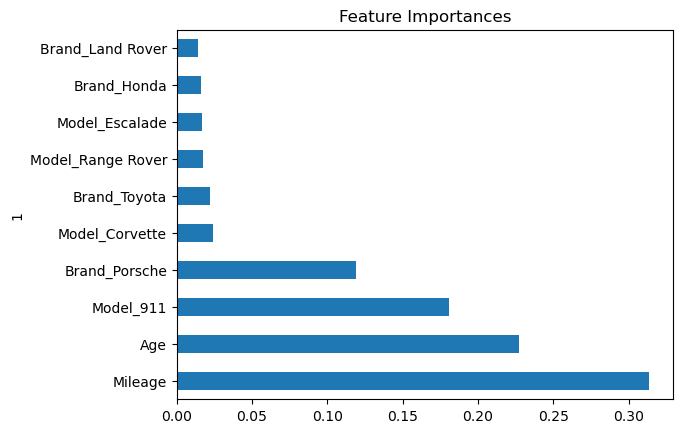

In [47]:
#Decision Trees
importances = rf_model.feature_importances_
zipData = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_df = pd.DataFrame(zipData)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1,inplace=True)
importances_df.rename(columns={0:'Feature Importances'},inplace=True)
#importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted = importances_df.nlargest(10,'Feature Importances')
importances_sorted.plot(kind='barh',title='Feature Importances',legend=False)